In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sqlite3

In [4]:
con= sqlite3.connect(r"C:\Users\divya\OneDrive\Documents\dataset\password_data.sqlite")

In [5]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [6]:
data.shape

(100000, 3)

In [7]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [8]:
data.drop(["index"], axis=1, inplace= True)

In [9]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [12]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

1) How many password textual actually holds only numeric characters ?

2) How many password textual actually holds only Upper-case character ?

3) How many password textual actually holds alpha-numeric character ?

4) How many password textual actually holds title-case character?

5) How many password textual actually holds some special special character ?

In [13]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [14]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [15]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [16]:
data[data['password'].str.isupper()].shape

(1506, 2)

In [17]:
data[data['password'].str.isalpha()].shape

(50, 2)

In [18]:
data[data['password'].str.isalnum()].shape

(97203, 2)

In [19]:
data[data['password'].str.istitle()].shape

(932, 2)

In [20]:
import string

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def find_specialchar(row):
    for char in row:
        if char in string.punctuation:
            return 1
    else:
         pass

In [23]:
data["password"].apply(find_specialchar)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [24]:
data["password"].apply(find_specialchar)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [25]:
data[data["password"].apply(find_specialchar)==1].shape

(2663, 2)

In [26]:
data["length"]=data["password"].str.len()

In [27]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [28]:
def lowercase_freq(row):
    return len([char for char in row if char.islower()])/len(row)

In [29]:
def uppercase_freq(row):
     return len([char for char in row if char.isupper()])/len(row)

In [30]:
def numericcase_freq(row):
     return len([char for char in row if char.isnumeric()])/len(row)

In [31]:
data["lowercase_freq"]=np.round(data["password"].apply(lowercase_freq) , 3)

data["uppercase_freq"]=np.round(data["password"].apply(uppercase_freq) , 3)

data["digit_freq"]=np.round(data["password"].apply(numericcase_freq) , 3)

In [32]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [33]:
def specialchar_freq(row):
    specialchar = []
    for char in row:
        if not char.isdigit() and not char.isalpha():
            specialchar.append(char)
    return len(specialchar)

In [34]:
data["specialchar_freq"]=np.round(data["password"].apply(specialchar_freq) , 3)

In [35]:
data["specialchar_freq"]=data["specialchar_freq"]/data["length"]

In [36]:
data.head(10)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,specialchar_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
5,16623670p,1,9,0.111,0.0,0.889,0.000000
6,yj9q3f8p,1,8,0.625,0.0,0.375,0.000000
7,180ZIRUVIcuFERy,2,15,0.200,0.6,0.200,0.000000
8,djredd09,1,8,0.750,0.0,0.250,0.000000
9,yin172015,1,9,0.333,0.0,0.667,0.000000


In [37]:
data[["length" , "strength"]].groupby(['strength']).agg(["min" , "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [38]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'specialchar_freq'],
      dtype='object')

In [39]:
cols='length', 'lowercase_freq', 'uppercase_freq','digit_freq', 'specialchar_freq'
for col in cols:
        print(data[[col , "strength"]].groupby(['strength']).agg(["min" , "max" , "mean" , "median"]))
        print('\n')

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1       

<Axes: xlabel='strength', ylabel='specialchar_freq'>

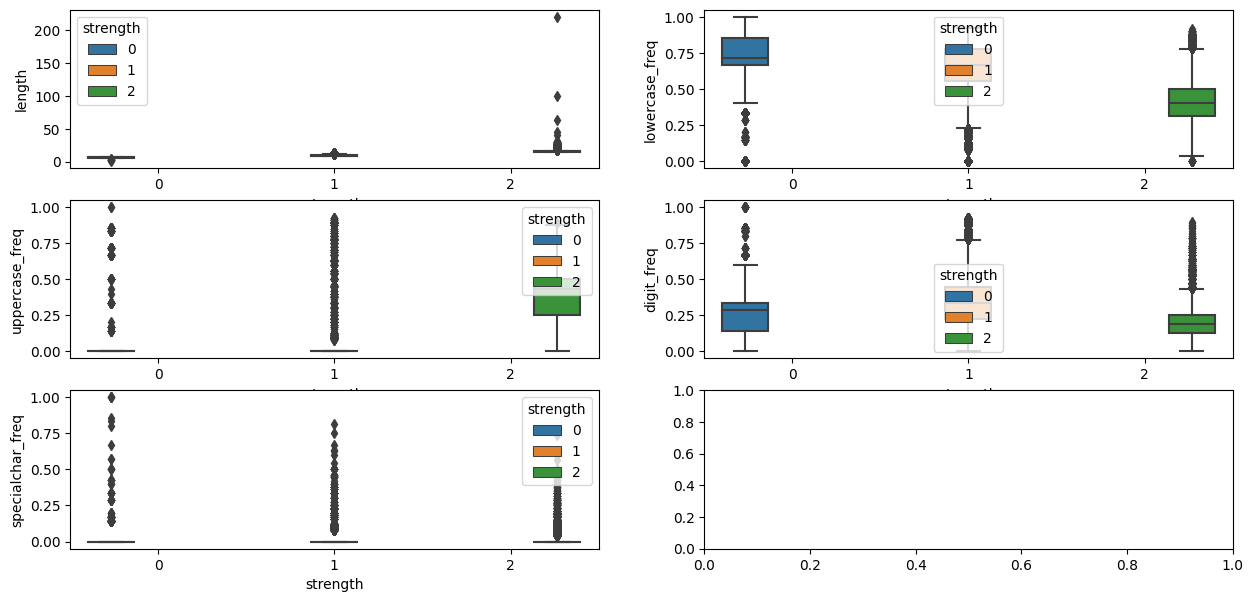

In [40]:
fig ,((ax1,ax2),(ax3,ax4),(ax5,ax6))= plt.subplots(3,2 , figsize=(15,7))
sns.boxplot(x="strength", y="length", hue="strength",ax=ax1 , data=data)
sns.boxplot(x="strength", y="lowercase_freq", hue="strength",ax=ax2 , data=data)
sns.boxplot(x="strength", y="uppercase_freq", hue="strength",ax=ax3 , data=data)
sns.boxplot(x="strength", y="digit_freq", hue="strength",ax=ax4 , data=data)
sns.boxplot(x="strength", y="specialchar_freq", hue="strength",ax=ax5 , data=data)




In [41]:
def get_dis(data,feature):
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data["strength"]==0][feature],color='red',hist=False,label='0')
    sns.distplot(data[data["strength"]==1][feature],color='green',hist=False,label='1')
    sns.distplot(data[data["strength"]==2][feature],color='blue',hist=False,label='2')
    
    plt.legend()
    plt.show()

In [42]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [43]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'specialchar_freq'],
      dtype='object')

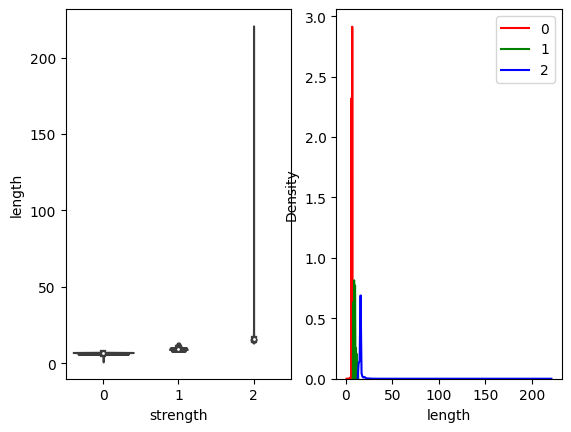

In [44]:
get_dis(data,"length")

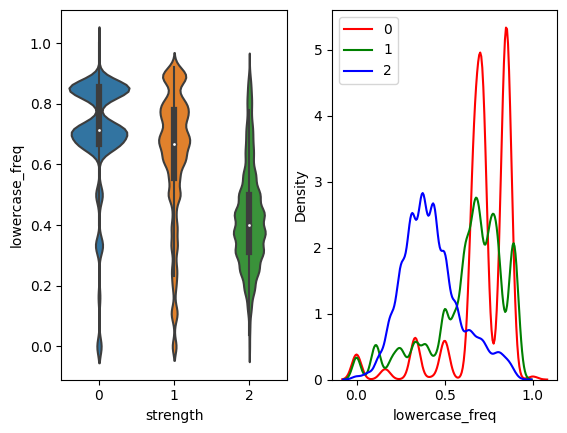

In [45]:
get_dis(data,"lowercase_freq")

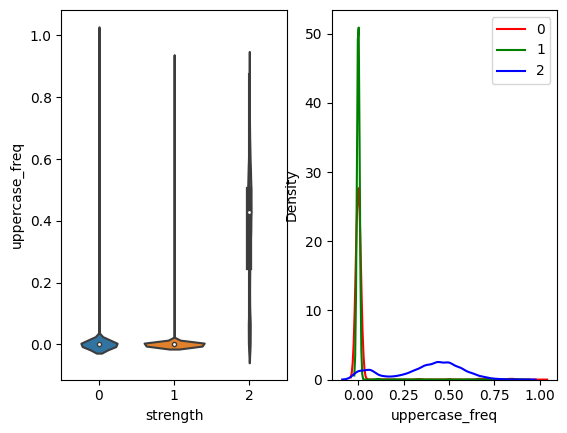

In [46]:
get_dis(data,"uppercase_freq")

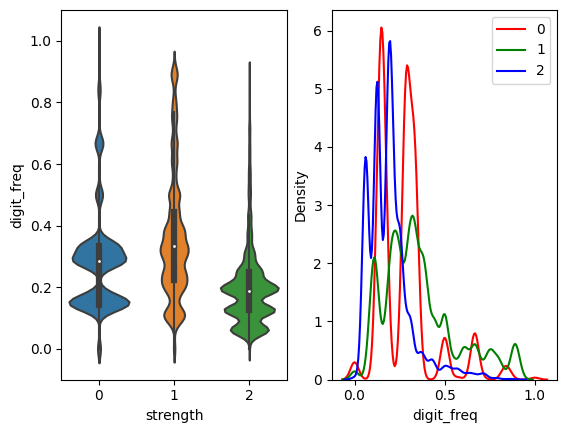

In [47]:
get_dis(data,"digit_freq")

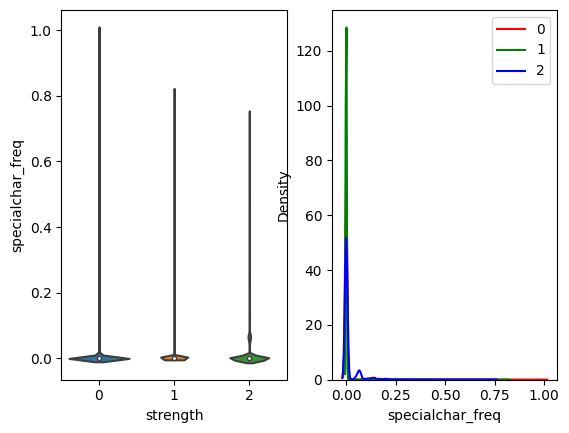

In [48]:
get_dis(data,"specialchar_freq")

In [49]:
dataframe= data.sample(frac=1)

In [50]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,specialchar_freq
34545,cedal333,1,8,0.625,0.000,0.375,0.0
26430,1532artem,1,9,0.556,0.000,0.444,0.0
84741,morphigmu1,1,10,0.900,0.000,0.100,0.0
36761,5u8AQATUyMgn7Q7V,2,16,0.250,0.500,0.250,0.0
47726,Mike7326561572,2,14,0.214,0.071,0.714,0.0
...,...,...,...,...,...,...,...
26552,Brunothiago1308,2,15,0.667,0.067,0.267,0.0
4923,bh5km50jfdw7,1,12,0.667,0.000,0.333,0.0
86686,0J8uz4zk0NgbggTq,2,16,0.562,0.188,0.250,0.0
70373,eltron87,1,8,0.750,0.000,0.250,0.0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
x= list(dataframe['password'])

In [53]:
vectorizer=TfidfVectorizer(analyzer='char')

In [54]:
X=vectorizer.fit_transform(x)

In [55]:
X.shape

(100000, 99)

In [56]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.79986828, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1981549 , 0.        , 0.31037344,
       0.29846217, 0.23212977, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.28574427, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [58]:
df2=pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())

In [59]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
dataframe.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'specialchar_freq'],
      dtype='object')

In [186]:
df2['length'] = dataframe['length'] 
df2['lowercase_freq'] = dataframe['lowercase_freq']



In [193]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
y= dataframe['strength']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [197]:
X_train.shape

(80000, 101)

In [198]:
y_train.shape

(80000,)

In [199]:
from sklearn.linear_model import LogisticRegression

In [200]:
clf = LogisticRegression(multi_class= 'multinomial')

In [201]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [202]:
y_pred= clf.predict(X_test)

In [203]:
from collections import Counter

In [204]:
Counter(y_pred)

Counter({1: 16681, 2: 1825, 0: 1494})

In [205]:
def predic():
    password= input("Enter a password: ")
    sample_array= np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass= len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix=np.append(sample_matrix.toarray(), (length_pass, length_normalised_lowercase)).reshape(1,101)
    result=clf.predict(new_matrix)

    if result == 0 :
        return "Password Is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [211]:
predic()

Enter a password: Divyanshu@94143077


'password is strong'